# Pendeteksi penyakit paru-paru menggunakan Deep-Multi-Layered CNN

#### Dataset

(Google Drive)
> https://drive.google.com/drive/folders/1oAJUw2UChrYMqUwLB8F-4RuX19WoeqsN?usp=sharing

(covid-chestxray-dataset)
> https://github.com/ieee8023/covid-chestxray-dataset


(Actualmed-COVID-chestxray-dataset)
> https://github.com/agchung/Actualmed-COVID-chestxray-dataset

(Kaggle Chest X-Ray Images (Pneumonia))
> https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

##### Penggunaan Library 

###### Library yang digunakan pada project ini sebagai berikut:
###### 1. tensorflow : untuk penggunaan deep learning
###### 2. glob : untuk penggunaan array
###### 3. numpy : untuk membuat objek kelas array tunggal dan multidimensi
###### 4. pandas : untuk mengatur tata letak data supaya mudah dicari
###### 5. tqdm : untuk menampilkan progress bar dengan perulangan yang sederhana
###### 6. opencv : untuk preprocessing data gambar 
###### 7. matplotlib : untuk visualisasi data
###### 8. scikitlearn-labelEncoder : untuk pre-processing dalam penamaan label setiap data
###### 9. scikitlearn-train_test_split : untuk pre-processing dalam pembagian data training dan testing
###### 10. keras : untuk penggunaan model deep learning

In [57]:
#Library
import tensorflow as tf
import glob 
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization, Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.layers.core import Activation, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Model
from joblib import dump
le = LabelEncoder()

##### Directory local dataset

In [124]:
# Actuamed Dir Local ALbert
# path = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\Actualmed-COVID-chestxray-dataset-master"

# Actumed Dir Local Jessica
path = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Actualmed-COVID-chestxray-dataset-master-20220416T062843Z-001\Actualmed-COVID-chestxray-dataset-master"

In [125]:
# Kaggle Dir Local Albert
# path2 = "C:\\Users\\alber\\Desktop\\Semester 6\\Pengolahan Citra Digital\\Python\kaggle"

# Kaggle Dir Local Jessica
path2 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\kaggle-20220416T062842Z-001\kaggle"


In [126]:
# Kaggle COVID Dir Local Jessica
path3 = "F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Kaggle Radiography"


#### Pemberian label 

###### Label pada data kaggle untuk Normal dan Pneumonia

In [128]:
## Label for Kaggle Dataset
class_label_kaggle = ["NORMAL","PNEUMONIA"]
le.fit(class_label_kaggle)
class_names_label = {class_label_kaggle:i for i, class_label_kaggle in enumerate(class_label_kaggle)}
class_labelname_kaggle = le.transform(class_label_kaggle)

###### Label pada data kaggle untuk COVID dan Normal

In [129]:
## Label for Kaggle Radiography Dataset
class_label_kaggle_radiography = ["COVID", "NORMAL"]
le.fit(class_label_kaggle_radiography)
class_names_label_kaggle_radiography = {class_label_kaggle_radiography:i for i, class_label_kaggle_radiography in enumerate(class_label_kaggle_radiography)}
class_labelname_kaggle_radiography = le.transform(class_label_kaggle_radiography)

In [130]:
class_names_label

{'NORMAL': 0, 'PNEUMONIA': 1}

In [131]:
class_names_label_kaggle_radiography

{'COVID': 0, 'NORMAL': 1}

In [132]:
os.listdir(path2)

['NORMAL', 'PNEUMONIA']

In [133]:
os.listdir(path3)

['COVID', 'NORMAL']

####  Preprocessing data

In [134]:
# Making label for kaggle dataset
images1 = []
labels1 = []
print("Loading {}".format(path2))
for folder in os.listdir(path2):
    label = class_names_label[folder]
    print(folder)
    for file in tqdm(os.listdir(os.path.join(path2, folder))):
        img_path = os.path.join(os.path.join(path2, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        images1.append(image)
        labels1.append(label)
images1 = np.array(images1, dtype = 'float32')
labels1 = np.array(labels1, dtype = 'int32')

Loading F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\kaggle-20220416T062842Z-001\kaggle
NORMAL


100%|██████████| 1306/1306 [02:17<00:00,  9.51it/s]


PNEUMONIA


100%|██████████| 4273/4273 [04:55<00:00, 14.46it/s]


In [135]:
# Making label for kaggle radiography dataset
images2 = []
labels2 = []
print("Loading {}".format(path3))
for folder in os.listdir(path3):
    label = class_names_label_kaggle_radiography[folder]
    print(folder)
    for file in tqdm(os.listdir(os.path.join(path3, folder))):
        img_path = os.path.join(os.path.join(path3, folder), file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))
        images2.append(image)
        labels2.append(label)
images2 = np.array(images2, dtype = 'float32')
labels2 = np.array(labels2, dtype = 'int32')

Loading F:\Backup Data\KULIAH KELAS\SEMESTER 6\9. Pengolahan Citra\Project Akhir\Kaggle Radiography
COVID


100%|██████████| 3616/3616 [00:33<00:00, 108.54it/s]


NORMAL


100%|██████████| 2637/2637 [00:27<00:00, 95.85it/s] 


In [136]:
## Adding label for kaggle dataset cause kaggle just do binary classification, meanwhile
## we want to have multiclass classification of 3, so we add 1
for i in range(len(labels1)):
  labels1[i] = labels1[i] + 1

In [137]:
labels1

array([1, 1, 1, ..., 2, 2, 2])

In [138]:
labels2

array([0, 0, 0, ..., 1, 1, 1])

In [139]:
# Actuamed Dataset
source = np.asarray(pd.read_csv(path + '\\metadata.csv'))

In [140]:
## Dataframe Actuamed
df = pd.DataFrame(source, columns=['patientid',	'offset', 'sex',	'age',	'finding',	
                                   'survival',	'temperature',	'pO2 saturation',	'view',	
                                   'modality',	'imagename','artifacts distortion',	'notes'])
df

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,imagename,artifacts distortion,notes
0,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313090023421...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
1,ANON196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200313100318375...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200313"
2,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317090830828...,NaN,Negative (covid-19 viral infection is excluded...
3,ANON56,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200317104341875...,NaN,Negative (covid-19 viral infection is excluded...
4,ANON196,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,PA,X-ray,CR.1.2.840.113564.1722810170.20200318082923328...,NaN,", date taken (YYYYMMDD): 20200318"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ANON33,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420155936364...,NaN,Negative (covid-19 viral infection is excluded...
234,ANON41,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420164750991...,NaN,Negative (covid-19 viral infection is excluded...
235,ANON93,NaN,NaN,NaN,No finding,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420190511734...,NaN,Negative (covid-19 viral infection is excluded...
236,ANON59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,DX.1.2.840.113564.1722810162.20200420203606112...,NaN,"Inconclusive, date taken (YYYYMMDD): 20200420"


In [142]:
## Actuamed
data = []
labels = []
for i in source:
  img = cv2.imread(path +'\\images\\'+ i[10])
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  label = i[4]
  data.append(img)
  labels.append(label)
data = np.array(data)
label = np.array(labels)

In [143]:
## Cek buat dataset actuamed, kalo datanya bersifat Nan artinya pneumonia
a = ['COVID-19', 'No finding']
for i in range(len(labels)): 
  if labels[i] not in a:
    labels[i] = 'pneumonia'

In [144]:
## Encoder label for actualmed
le.fit(labels)
labels = le.transform(labels)

In [145]:
## Combine the dataset (Actuamed & Python)
new_label = np.concatenate((labels, labels1, labels2), axis=0)
new_data = np.concatenate((data, images1, images2), axis=0)

In [146]:
# dibagi 255 untuk normalisasi
new_data = new_data/255.

In [147]:
new_label

array([2, 2, 1, ..., 1, 1, 1])

In [148]:
new_data.shape

(12070, 128, 128, 3)

In [149]:
new_data = new_data.reshape(len(new_data), 128, 128, 3)

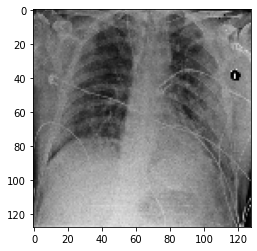

In [150]:
plt.imshow(new_data[15], cmap = 'gray')

In [151]:
data = data.reshape(len(data), 128, 128, 3)

In [152]:
# Check how many data each of the class feature 
# 0 -> covid
# 1 -> normal
# 2 -> pneumonia
print(len(np.where(new_label == 0)[0]))
print(len(np.where(new_label == 1)[0]))
print(len(np.where(new_label == 2)[0]))

3674
4070
4326


#### Deep Learning Model

In [153]:
# Model ResNet50
model = Sequential()
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=64,kernel_size=(7,7),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=2048, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=2048, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=2048, kernel_size=(1,1), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=3, activation="softmax"))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=3, activation="softmax"))


In [154]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1849

In [155]:
new_label = tf.keras.utils.to_categorical(new_label, num_classes=3)

#### Training dan testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_data, new_label, test_size=0.2, random_state=1)

In [157]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
302/302 [==============================] - 210s 679ms/step - loss: 0.4830 - accuracy: 0.7963 - val_loss: 0.3006 - val_accuracy: 0.8911
Epoch 2/50
302/302 [==============================] - 179s 594ms/step - loss: 0.2814 - accuracy: 0.8977 - val_loss: 0.2416 - val_accuracy: 0.9147
Epoch 3/50
302/302 [==============================] - 170s 564ms/step - loss: 0.2222 - accuracy: 0.9210 - val_loss: 0.1836 - val_accuracy: 0.9366
Epoch 4/50
302/302 [==============================] - 152s 503ms/step - loss: 0.1855 - accuracy: 0.9352 - val_loss: 0.1866 - val_accuracy: 0.9350
Epoch 5/50
302/302 [==============================] - 132s 435ms/step - loss: 0.1561 - accuracy: 0.9457 - val_loss: 0.1908 - val_accuracy: 0.9292
Epoch 6/50
302/302 [==============================] - 117s 388ms/step - loss: 0.1281 - accuracy: 0.9552 - val_loss: 0.1908 - val_accuracy: 0.9387
Epoch 7/50
302/302 [==============================] - 112s 369ms/step - loss: 0.1052 - accuracy: 0.9615 - val_loss: 0.1708 -

In [160]:
model.evaluate(x_test,y_test)

76/76 [==============================] - 12s 151ms/step - loss: 0.4767 - accuracy: 0.9557


[0.4766841232776642, 0.9556752443313599]

In [161]:
# Print the accuracy of the model
print(classification_report(np.argmax(new_label, axis=-1), np.argmax(model.predict(new_data), axis=-1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3674
           1       0.99      0.99      0.99      4070
           2       0.99      0.99      0.99      4326

    accuracy                           0.99     12070
   macro avg       0.99      0.99      0.99     12070
weighted avg       0.99      0.99      0.99     12070



In [162]:
test = data[1].reshape(1, 128, 128, 3)

In [163]:
model.predict(test)

array([[0., 0., 1.]], dtype=float32)

In [164]:
np.argmax(model.predict(test), axis=-1)

array([2], dtype=int64)

#### Save dan Load Model

In [165]:
## Save deep learning model
model.save("cxr_model2.h5")

In [166]:
## Load the model
# loaded_model = load_model("cxr_model.h5")

## Load the model
# loaded_model = load_model("cxr_model1.h5")

## Load the model
loaded_model = load_model("cxr_model2.h5")

In [167]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1849

In [168]:
## Test the loaded model again
loaded_model.evaluate(x_test,y_test)

76/76 [==============================] - 25s 317ms/step - loss: 0.4767 - accuracy: 0.9557


[0.4766841232776642, 0.9556752443313599]

In [33]:
class_label = ["Covid-19", "No Finding", "Pneumonia"]

In [ ]:
## For Predict the Image
%matplotlib inline
from google.colab import file
 
uploaded = file.upload()
 
for fn in uploaded.keys():

  path = fn
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (128, 128))

img = img.reshape(1, 128, 128, 3)

print(fn)

plt.imshow(img.reshape(128,128,3))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_label[np.argmax(model.predict(img))])
plt.show()